In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import KFold
from sklearn import metrics


In [2]:
csv_data = pd.read_csv('database.csv')

In [3]:
csv_data = csv_data.drop('Unnamed: 0',axis = 1)   #消除第0行

In [4]:
label_name = {
    0:'success',
    1:'fail',
    2:'noExtusion'
}

csv_data['label'] = csv_data['label'].map(label_name)   #將label的0 1 2置換成列印狀態
csv_data

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
0,91,43.241089,0.567264,5.664850,0.606771,0.041667,0.703857,0.979167,success
1,93,39.994205,0.516262,5.246231,0.643667,0.043478,0.662506,0.978261,success
2,88,39.861607,0.513090,5.051593,0.648104,0.043478,0.657010,0.978261,success
3,92,40.643448,0.525302,5.139467,0.643667,0.043478,0.662506,0.978261,success
4,90,43.750767,0.594056,5.539417,0.571996,0.045290,0.751167,0.977355,success
5,93,39.190777,0.489991,5.172386,0.648104,0.043478,0.657010,0.978261,success
6,93,45.541195,0.596474,5.755230,0.588906,0.043478,0.728203,0.978261,success
7,93,34.259499,0.411603,5.098289,0.713145,0.043478,0.572880,0.978261,success
8,14,2.194813,0.155902,2.628523,1.000000,0.000000,0.000000,1.000000,success
9,14,2.199826,0.161455,2.615767,1.000000,0.000000,0.000000,1.000000,success


###  進行validation 將資料分為五等分    其中四等拿來train 一等拿來test  ,故可訓練出五種分類器

In [5]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
model = SVC(C = 1.0 ,kernel = 'rbf' ,random_state=0)
Features = csv_data.drop('label',axis=1)
Label = csv_data['label']

In [6]:
accuracies = []
confmats = []
for train_index, test_index in k_fold.split(Label):
    #print(np.shape(test_index))
    #print(np.shape(train_index))
    trained = model.fit(Features.loc[train_index].values, Label.loc[train_index].values)
    X_test = Features.loc[test_index].values
    y_test = Label.loc[test_index].values
    accuracies.append(trained.score(X_test, y_test))
    y_pred = model.predict(X_test)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))
    

In [7]:
accuracies  #五個模型的準確度

[0.9550802139037433,
 0.9251336898395722,
 0.9433155080213904,
 0.9571734475374732,
 0.9293361884368309]

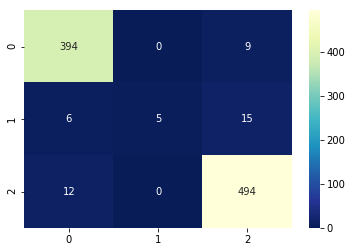

In [8]:
sns.heatmap(confmats[0], cmap="YlGnBu_r", annot=True, fmt="d")